In [1]:
# instalar a biblioteca Yahoo Finance
!pip install yfinance

  Using cached yfinance-0.2.38-py2.py3-none-any.whl (72 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached peewee-3.17.3.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.4.2-cp38-cp38-win_amd64.whl (36 kB)
  Using cached lxml-5.2.1-cp38-cp38-win_amd64.whl (3.8 MB)
  Created wheel for peewee: filename=peewee-3.17.3-py3-none-any.whl size=138453 sha256=898fe4041097ea88c84e6d0576812e651e04b65d0582d760a3064c464673b357
  Stored in 

In [2]:
# importando o Yahoo Finance e o módulo para análise dos dados
import yfinance as yf
import datetime as dt
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def data_entry():
    # as variáveis foram definidas como globais para poderem ser usadas fora da função
    global stock_code, start_date, end_date, data

    #irá rodar este código caso não exista erro:
    while True:
        try:
            print('Código da ação pode ser encontrado neste link: https://br.financas.yahoo.com/')
            stock_code = input("Digite o código da ação (ex: BBDC4.SA): ").upper()
            start_date = input("Digite a data de início no formato YYYY-MM-DD: ")
            end_date = input("Digite a data de fim no formato YYYY-MM-DD: ")

            # strptime: "String To Parse Time" - transforma string para datetime
            # O código dt.datetime.strptime é usado para converter uma string que representa uma data e hora em um objeto datetime.
            # modulo yfinance end diminui 1 dia do dado input, para consertar isso usa-se o timedelta e adiciona-se 1 dia de volta
            end_date_adjusted = dt.datetime.strptime(end_date, '%Y-%m-%d') + timedelta(days=1)
            # criação e exibição de um dataframe
            # yf.download aceita tanto strings quanto objetos datetime como parâmetros de start e end.
            data = yf.download(stock_code, start=start_date, end=end_date_adjusted )
            display(data)
            break

        # irá rodar estas mensagens caso exista um erro
        except Exception as e:
          print(f"\nErro: {e}")
          print('''
          Siga esta padrão para entrada de dados. Exemplo:
          Digite o código da ação (ex: BBDC4.SA):BBDC4.SA
          Digite a data de início no formato YYYY-MM-DD: 2008-01-01
          Digite a data de fim no formato YYYY-MM-DD: 2023-01-01
          ''')

data_entry()

Código da ação pode ser encontrado neste link: https://br.financas.yahoo.com/
Digite o código da ação (ex: BBDC4.SA): BBDC4.SA
Digite a data de início no formato YYYY-MM-DD: 2018-01-01
Digite a data de fim no formato YYYY-MM-DD: 2023-01-01


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,19.380507,19.807390,19.363432,19.693554,14.817990,14794320
2018-01-03,19.670788,19.938301,19.556952,19.773239,14.886122,9683264
2018-01-04,19.801699,20.234274,19.801699,20.097670,15.130360,16803885
2018-01-05,20.046444,20.211506,19.881384,20.211506,15.216063,11602172
2018-01-08,20.188740,20.257040,19.938301,20.205814,15.211780,11357609
...,...,...,...,...,...,...
2022-12-23,14.950000,15.280000,14.910000,15.140000,13.684012,21104200
2022-12-26,15.090000,15.130000,14.740000,14.780000,13.358632,13937200
2022-12-27,14.940000,14.980000,14.560000,14.710000,13.295364,78235200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2018-01-02 to 2022-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1239 non-null   float64
 1   High       1239 non-null   float64
 2   Low        1239 non-null   float64
 3   Close      1239 non-null   float64
 4   Adj Close  1239 non-null   float64
 5   Volume     1239 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.8 KB


In [5]:
# valores estatísticos da ação na fechamento
#round formatará para ficar com duas casas decimais

arr_stock_close = np.array(data.Close)

minimum = np.min(arr_stock_close)
print(f"Valor mínimo da ação {stock_code} no fechamento:", round(minimum,2))

maximum = np.max(arr_stock_close)
print(f"Valor máximo da ação {stock_code} no fechamento:", round(maximum,2))

mean = np.mean(arr_stock_close)
print(f"Valor médio da ação {stock_code} no fechamento:", round(mean,2))

median = np.median(arr_stock_close)
print(f"Mediana da ação {stock_code} no fechamento:", round(median,2))

standart_deviation = np.std(arr_stock_close)
print(f"O desvio padrão dos valores de {stock_code} no fechamento:", round(standart_deviation,2))


Valor mínimo da ação BBDC4.SA no fechamento: 13.28
Valor máximo da ação BBDC4.SA no fechamento: 29.61
Valor médio da ação BBDC4.SA no fechamento: 21.09
Mediana da ação BBDC4.SA no fechamento: 20.41
O desvio padrão dos valores de BBDC4.SA no fechamento: 3.65


In [6]:
# Encontrar os índices dos valores NaN
missing_values = np.isnan(data.Close).sum()
print(f"NaN encontrados: {missing_values}")
# Tratando os valores ausentes (substituindo pela média, por exemplo)
if missing_values > 0:
    data['Close'].fillna(mean, inplace=True)

NaN encontrados: 0


In [7]:
# criação da coluna variação percentual: preço de fechamento (Close) de um dia para o outro no DataFrame
# O método pct_change() calcula a variação percentual entre o valor atual e um valor anterior.
# Multiplicar por 100 transforma a variação em porcentagem.
data['Variação Percentual'] = data['Close'].pct_change() * 100

# dados mensais da coluna ‘Variação Percentual’.
# O método resample('M') é usado para reamostrar os dados em uma frequência mensal.
# O método agg() é então usado para calcular a média (mean) e a mediana (median) da variação percentual para cada mês.
monthly_summary = data.resample('M').agg({'Variação Percentual': ['mean', 'median']})

print(monthly_summary)


           Variação Percentual          
                          mean    median
Date                                    
2018-01-31            0.795393  0.671327
2018-02-28           -0.258394 -0.336017
2018-03-31            0.095267  0.502650
2018-04-30           -0.167537 -0.029193
2018-05-31           -0.788937 -0.613290
2018-06-30           -0.351156 -0.536403
2018-07-31            0.623006  0.744341
2018-08-31           -0.291899 -0.032326
2018-09-30            0.067123  0.245616
2018-10-31            0.855574  0.361834
2018-11-30            0.629443 -0.084075
2018-12-31            0.041987 -0.185271
2019-01-31            0.767941  0.610645
2019-02-28           -0.205706 -0.614999
2019-03-31           -0.015608  0.289855
2019-04-30           -0.019838 -0.229223
2019-05-31            0.194122 -0.269691
2019-06-30            0.110089 -0.165796
2019-07-31           -0.390855 -0.356259
2019-08-31           -0.198515 -0.640506
2019-09-30            0.151493 -0.057937
2019-10-31      

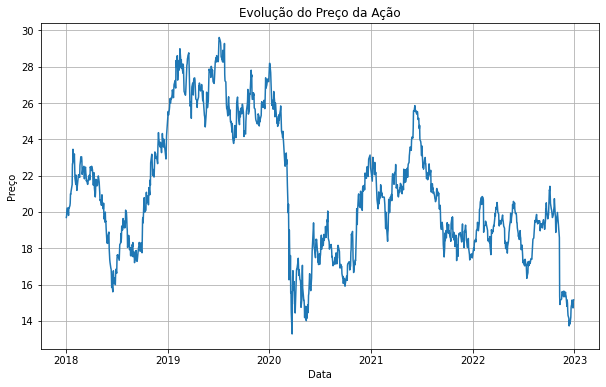

In [8]:
plt.figure(figsize=(10, 6))
# gráfico de linha da ação
plt.plot(data.index, data["Close"])
plt.xlabel('Data')     # rótulo do eixo X
plt.ylabel('Preço')   # rótulo do eixo Y
plt.title('Evolução do Preço da Ação')  # Título do Gráfico
plt.grid(True)        # Linhas de grades no gráfico
plt.show()            # Exibe o Gráfico

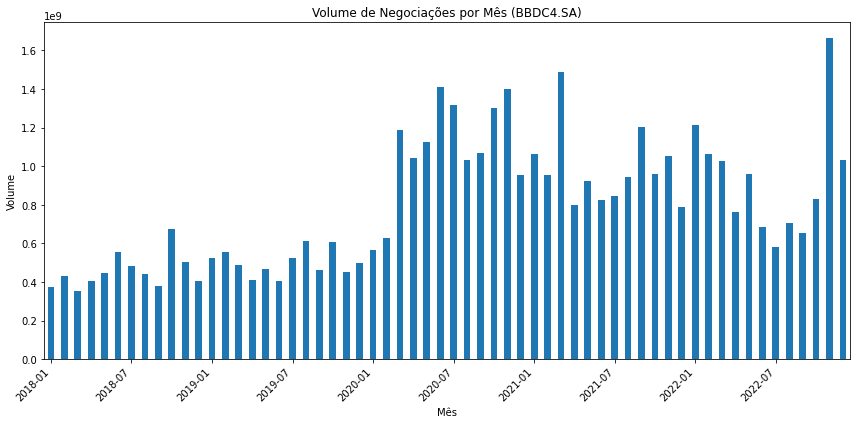

In [9]:
plt.figure(figsize=(12, 6))
# Reamostragem de 'Volume' por mês e soma dos valores
monthly_volume = data['Volume'].resample('M').sum()
monthly_volume.plot(kind='bar', title=f'Volume de Negociações por Mês ({stock_code})', xlabel='Mês', ylabel='Volume')
# Rotacionar as etiquetas do eixo x e as mostra de 6 em 6 meses para melhor legibilidade
# strftime: "String From Time" - transforma datetime em string
# date.strftime('%Y-%m') formata a data correspondente(date) mostrando o ano e o mês
# i, date in enumerate descompacta cada elemento da enumeração, onde i é a posição do índice e date é o valor correspondente do índice
# if i % 6 verifica se o índice atual(i) é um múltiplo de 6.
# ha='right' alinhamento dos xticks à direita
plt.xticks(range(0, len(monthly_volume.index), 6), [date.strftime('%Y-%m') for i, date in enumerate(monthly_volume.index) if i % 6 == 0], rotation=45, ha='right')
plt.tight_layout()
plt.show()

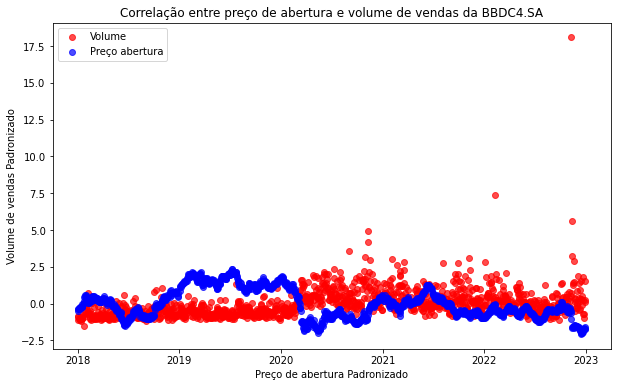

In [10]:
# print(data['Volume'])

from sklearn.preprocessing import StandardScaler

# normalização dos valores
scaler = StandardScaler()
open_norm = scaler.fit_transform(data['Open'].values.reshape(-1, 1))
volume_norm = scaler.fit_transform(data['Volume'].values.reshape(-1, 1))

plt.figure(figsize=(10, 6))


# Cria o o grafico de Volume
plt.scatter(data.index, volume_norm, label='Volume', color='red', alpha=.7)
# Cria o o grafico de Open
plt.scatter(data.index, open_norm, label='Preço abertura', color='blue', alpha=.7)

plt.xlabel('Preço de abertura Padronizado')
plt.ylabel('Volume de vendas Padronizado')
plt.title(f'Correlação entre preço de abertura e volume de vendas da {stock_code}') # Título do Gráfico
plt.legend()
plt.show()